# Part 0: Import 套件

In [1]:
#下載資料套件
import urllib3
from bs4 import BeautifulSoup
import requests as r

#資料處理套件
import json
import pandas as pd
from datetime import datetime, date, timedelta

# 畫圖套件
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Part 1: 下載期交所30天以上選擇權Put/Call比
- 股海小英雄youtube影片：[【Python 爬蟲】台指選擇權Put/Call比免費下載 (下)｜股市多空頭長線預測｜突破30天下載限制](https://youtu.be/uUqXf_SA2F0)
- 資料來源：[台灣期交所 臺指選擇權 Put/Call Ratios 統計表 ](https://www.taifex.com.tw/cht/3/pcRatio)

In [2]:
def date_range(start_year, start_month, start_day, end_year, end_month, end_day):
    # 將開始日跟結束日轉為時間型態
    start_date = date(start_year, start_month, start_day)
    end_date = date(end_year, end_month, end_day)
    
    # 在開始日與結束日區間內 以每30天為單位切分 不含結束日
    date_list = pd.date_range(start_date, end_date, freq='30D').tolist()
    
    # 加上結束日 
    if date_list[-1] != end_date:
        date_list.append(end_date)
    
    return date_list

In [3]:
def pc_ratio(date_list):
    # 設定urllib物件,下載網址,儲存資料的df
    http = urllib3.PoolManager()
    url = "https://www.taifex.com.tw/cht/3/pcRatio"
    df = pd.DataFrame()
    
    # 下載期交所P/C比的迴圈
    for idx in range(len(date_list) - 1):
        # 設定下載資料的起始日 queryStartDate & queryEndDate
        if idx == 0:
            start_date = date_list[idx].strftime("%Y/%m/%d")
        else:
            start_date = (date_list[idx] + timedelta(days = 1)).strftime("%Y/%m/%d")
        end_date = date_list[idx + 1].strftime("%Y/%m/%d")
        print("迴圈索引值: ", idx, "; 下載時間區間: ", start_date, "-",end_date)
        
        # 從期交所下載資料
        res = http.request(
             'POST',
              url,
              fields={
                 'queryStartDate': start_date,
                 'queryEndDate': end_date
              }
         )
        html_doc = res.data
        table = BeautifulSoup(html_doc, 'html.parser').table
        pc_ratio_df = pd.read_html(str(table))[3]
        df = df.append(pc_ratio_df, ignore_index = True)
    
    # 日期欄位資料型態從文字轉為時間
    for row in range(df.shape[0]):
        date2 = df.iloc[row,0].split('/')
        df.iloc[row, 0] = datetime(int(date2[0]), int(date2[1]), int(date2[2]))
    
    # dataframe 按照日期排序
    df.sort_values("日期", inplace=True, ignore_index = True)
    
    # 設定 dataframe 的欄位名稱
    df.columns = ['日期', '賣權成交量', '買權成交量', '買賣權成交量比率%', '賣權未平倉量', '買權未平倉量', '買賣權未平倉量比率%']
    return df

In [4]:
date_list = date_range(start_year = 2021, 
                       start_month = 8, 
                       start_day = 1, 
                       end_year = 2021, 
                       end_month = 9, 
                       end_day = 26)

df_pc = pc_ratio(date_list)
df_pc

迴圈索引值:  0 ; 下載時間區間:  2021/08/01 - 2021/08/31
迴圈索引值:  1 ; 下載時間區間:  2021/09/01 - 2021/09/26


,日期,賣權成交量,買權成交量,買賣權成交量比率%,賣權未平倉量,買權未平倉量,買賣權未平倉量比率%
0,2021-08-02 00:00:00,338059,305124,110.79,237570,201188,118.08
1,2021-08-03 00:00:00,320081,272288,117.55,262276,218840,119.85
2,2021-08-04 00:00:00,490053,398553,122.96,160675,141543,113.52
3,2021-08-05 00:00:00,158396,113045,140.12,210999,168245,125.41
4,2021-08-06 00:00:00,243829,228018,106.93,243176,195317,124.50
5,2021-08-09 00:00:00,271666,298988,90.86,266233,221434,120.23
6,2021-08-10 00:00:00,318535,373471,85.29,274400,258451,106.17
7,2021-08-11 00:00:00,671355,607894,110.44,175921,169982,103.49
8,2021-08-12 00:00:00,193014,206145,93.63,207351,205649,100.83
9,2021-08-13 00:00:00,283083,340522,83.13,222768,242353,91.92


In [5]:
df_pc['買賣權未平倉量比率差%'] = df_pc['買賣權未平倉量比率%'] - 100

In [6]:
df_pc

,日期,賣權成交量,買權成交量,買賣權成交量比率%,賣權未平倉量,買權未平倉量,買賣權未平倉量比率%,買賣權未平倉量比率差%
0,2021-08-02 00:00:00,338059,305124,110.79,237570,201188,118.08,18.08
1,2021-08-03 00:00:00,320081,272288,117.55,262276,218840,119.85,19.85
2,2021-08-04 00:00:00,490053,398553,122.96,160675,141543,113.52,13.52
3,2021-08-05 00:00:00,158396,113045,140.12,210999,168245,125.41,25.41
4,2021-08-06 00:00:00,243829,228018,106.93,243176,195317,124.50,24.50
5,2021-08-09 00:00:00,271666,298988,90.86,266233,221434,120.23,20.23
6,2021-08-10 00:00:00,318535,373471,85.29,274400,258451,106.17,6.17
7,2021-08-11 00:00:00,671355,607894,110.44,175921,169982,103.49,3.49
8,2021-08-12 00:00:00,193014,206145,93.63,207351,205649,100.83,0.83
9,2021-08-13 00:00:00,283083,340522,83.13,222768,242353,91.92,-8.08


# Part 2: 下載台股加權股價指數歷史資料
- 股海小英雄youtube影片：[【Python 爬蟲】台股市場成交資訊免費下載｜從成交量判斷大盤進出點](https://youtu.be/JXGl6pfvB-o)
- 資料來源：[台灣證交所 每日市場成交資訊](https://www.twse.com.tw/zh/page/trading/exchange/FMTQIK.html)

In [7]:
def get_tw_market_data(start_year, start_month, end_year, end_month):
    start_date = str(date(start_year, start_month, 1))
    end_date = str(date(end_year, end_month, 1))
    month_list = pd.date_range(start_date, end_date, freq='MS').strftime("%Y%m%d").tolist()
    
    df = pd.DataFrame()
    for month in month_list:
        url = "https://www.twse.com.tw/exchangeReport/FMTQIK?response=json&date="+ month
        res = r.get(url)
        stock_json = res.json()
        stock_df = pd.DataFrame.from_dict(stock_json['data'])
        df = df.append(stock_df, ignore_index = True)
        
    # 資料轉型
    for col in [0, 1, 2, 3, 4]:
        for row in range(df.shape[0]):
            # 把"日期"從字串(string)換成時間(datetime)，並將民國年換成西元年
            if col == 0:
                day = df.iloc[row,0].split('/')
                df.iloc[row, 0] = datetime(int(day[0]) + 1911, int(day[1]), int(day[2]))  
            # 把"開盤價", "最高價", "最低價", "收盤價"帶有逗號的字串(string)換成浮點數(float) 
            elif col != 0:
                df.iloc[row, col] = float(df.iloc[row,col].replace(',', ''))
    
    df.columns = ['日期', '成交股數', '成交金額', '成交筆數', '發行量股價加權指數', '漲跌點數']
    return df

In [8]:
df_market = get_tw_market_data(start_year = 2021, 
                               start_month = 8, 
                               end_year = 2021, 
                               end_month = 9)
df_market

,日期,成交股數,成交金額,成交筆數,發行量股價加權指數,漲跌點數
0,2021-08-02 00:00:00,8433835543.0,440189515085.0,2581704.0,17503.28,255.87
1,2021-08-03 00:00:00,7297083331.0,390300020287.0,2300155.0,17553.76,50.48
2,2021-08-04 00:00:00,8674006828.0,379090333818.0,2535997.0,17623.89,70.13
3,2021-08-05 00:00:00,9310147655.0,385923439915.0,2803525.0,17603.12,-20.77
4,2021-08-06 00:00:00,8507806575.0,401257559286.0,2764690.0,17526.28,-76.84
5,2021-08-09 00:00:00,7894068144.0,352402466708.0,2493714.0,17485.15,-41.13
6,2021-08-10 00:00:00,7424101809.0,352995785011.0,2356807.0,17323.64,-161.51
7,2021-08-11 00:00:00,8485348305.0,392285506858.0,2702640.0,17227.18,-96.46
8,2021-08-12 00:00:00,6583768656.0,322543314397.0,2063506.0,17219.94,-7.24
9,2021-08-13 00:00:00,8080387820.0,386639052024.0,2570094.0,16982.11,-237.83


# Part 3: 選擇權 put/call 未平倉比率圖 

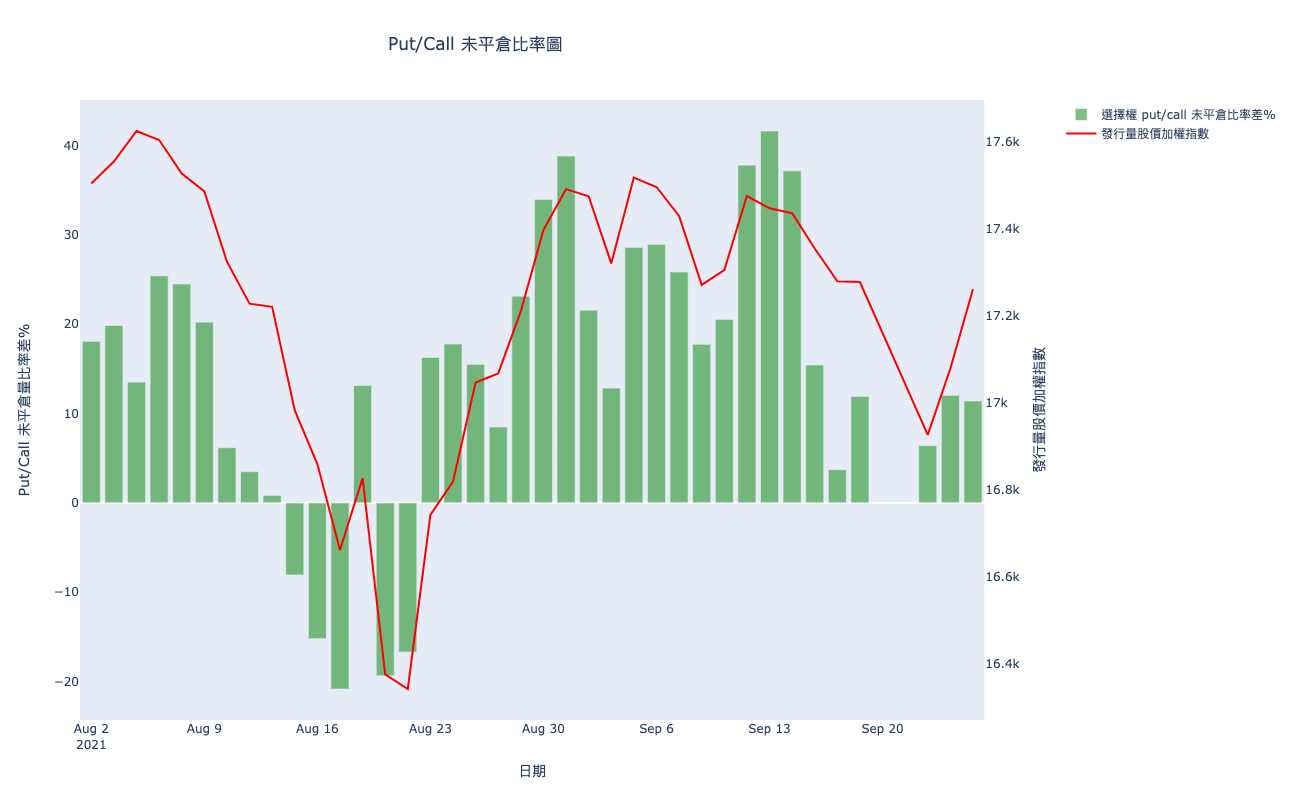

In [17]:
# 設定圖有兩個y軸
fig = make_subplots(specs=[[{"secondary_y": True}]])

# 畫長條圖
fig.add_trace(go.Bar(x = df_pc['日期'],
                     y = df_pc['買賣權未平倉量比率差%'],
                     name = '選擇權 put/call 未平倉比率差%',
                     marker = dict(color = 'green'),
                     opacity = 0.5),
              secondary_y = False)

# 畫折線圖
fig.add_trace(
    go.Scatter(x = df_market['日期'], 
               y = df_market['發行量股價加權指數'], 
               name = "發行量股價加權指數", 
               line = dict(color = "red", width = 2)),
    secondary_y = True)

# 設定圖的x跟y軸標題

fig.update_xaxes(title_text = "日期",
                    rangebreaks = [{ 'pattern': 'day of week', 'bounds': [6, 1]}])

fig.update_yaxes(showgrid = False, 
                 title_text = "Put/Call 未平倉量比率差%",
                 secondary_y = False)

fig.update_yaxes(showgrid = False, 
                 title_text = "發行量股價加權指數",
                 secondary_y = True)


# 設定圖的標題跟長寬
fig.update_layout(title_text = "Put/Call 未平倉比率圖", 
                  title_x = 0.3,
                  width = 1000, 
                  height = 800)

fig.show()